## Thyroid disease detection

### Table of content
- Introduction
- Executive summary
- Data and methods
- Data cleaning and feature engineering
- EDA
- Model training
- Conclusion
- Future recommendation

## Introduction
Thyroid is an important butterfly shaped gland present in front of our neck. This gland produce thyroid hormone
which is reponsible for controlling and maintaining essential functions of our body such as metablism.
Due to many reasons funcitoning of thyroid gland may get affected. The two main abnormalities of thyroid gland is 
hypothyroidism and hyperthyroidism. In hyperthyroidism there may be excess production of thyroid hormones 
whereas in hypothyroidism there may be less produciton of thyroid hormone.
Now it is very difficult to diagnose thyroid disorder just by looking sign and symptoms. so, laboratory test 
are important to diagnose thyroid disorder.

## Executive Summary

## Data and Methods
we got this dataset from UCI Machine repository named 'Thyroid Disease'. There are many databases in this repository.
But we are working with dataset named thyroid0387.txt. 
This dataset contain 29 independent columns and one dependent columns. Dependent column is having categorical featueres with 7 classes. 
There are 9173 rows. 



1. Data Summary and Overview. 
2. check columns for missing values, if missing column have more than 50% missing data than dorp it. 
3. Drop the "measured" columns as measurement are already available. 
4. Replace M:0 and F:1, f:0 and t:1. 
5. Check for outliers values.       
6. Ecnode "referal_code using" get_dummies(). 
7. convert the classes into encodings. 
8. Check for categorical columns for unexpected value 
9. check numerical column for outlier  
10. apply imputers to replace missing values. 
11. Check for numerical and categorical features, (categorical can be converted to OHV) 
12. check for duplicate data 
13. visualize various features to check for distribution. if distribution is not proper apply log transform. 
14. check the points that belong to classes. if imbalanced  appy over sampling techniques. 

## Data Cleaning and Feature Engineering

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
%pwd

'c:\\Users\\aakas\\Documents\\Projects\\Thyroid-disease-detection\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\aakas\\Documents\\Projects\\Thyroid-disease-detection'

In [5]:
file_path = './artifact/ingested_data/thyroid_merged_20230825_173422.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)


In [6]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [7]:
df.shape

(11972, 30)

In [8]:
df.info()
#age is float and all other columns are object/string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11972 entries, 0 to 11971
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        11971 non-null  float64
 1   sex                        11555 non-null  object 
 2   on_thyroxine               11972 non-null  object 
 3   query_on_thyroxine         11972 non-null  object 
 4   on_antithyroid_medication  11972 non-null  object 
 5   sick                       11972 non-null  object 
 6   pregnant                   11972 non-null  object 
 7   thyroid_surgery            11972 non-null  object 
 8   I131_treatment             11972 non-null  object 
 9   query_hypothyroid          11972 non-null  object 
 10  query_hyperthyroid         11972 non-null  object 
 11  lithium                    11972 non-null  object 
 12  goitre                     11972 non-null  object 
 13  tumor                      11972 non-null  obj

### case noramlization
convert all to lower case


In [9]:
# Convert all object columns to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [10]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,class
0,41.0,f,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,svhc,negative
1,23.0,f,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,m,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,f,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,f,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,svi,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11967,56.0,m,f,f,f,f,f,f,f,f,...,t,64.0,t,0.83,t,77.0,f,NaN,svi,negative
11968,22.0,m,f,f,f,f,f,f,f,f,...,t,91.0,t,0.92,t,99.0,f,NaN,svi,negative
11969,69.0,m,f,f,f,f,f,f,f,f,...,t,113.0,t,1.27,t,89.0,f,NaN,svi,i
11970,47.0,f,f,f,f,f,f,f,f,f,...,t,75.0,t,0.85,t,88.0,f,NaN,other,negative


## check for missing values

In [11]:
df.isnull().sum().sum()
#There are 14,659 missing values

19185

In [12]:
#Handling missing values
df.isnull().sum().sort_values(ascending=False)

TBG                          11623
T3                            3189
TSH                           1126
T4U                           1106
FTI                           1097
TT4                            626
sex                            417
age                              1
referral_source                  0
TBG_measured                     0
FTI_measured                     0
T4U_measured                     0
TT4_measured                     0
T3_measured                      0
TSH_measured                     0
psych                            0
hypopituitary                    0
tumor                            0
goitre                           0
lithium                          0
query_hyperthyroid               0
query_hypothyroid                0
I131_treatment                   0
thyroid_surgery                  0
pregnant                         0
sick                             0
on_antithyroid_medication        0
query_on_thyroxine               0
on_thyroxine        

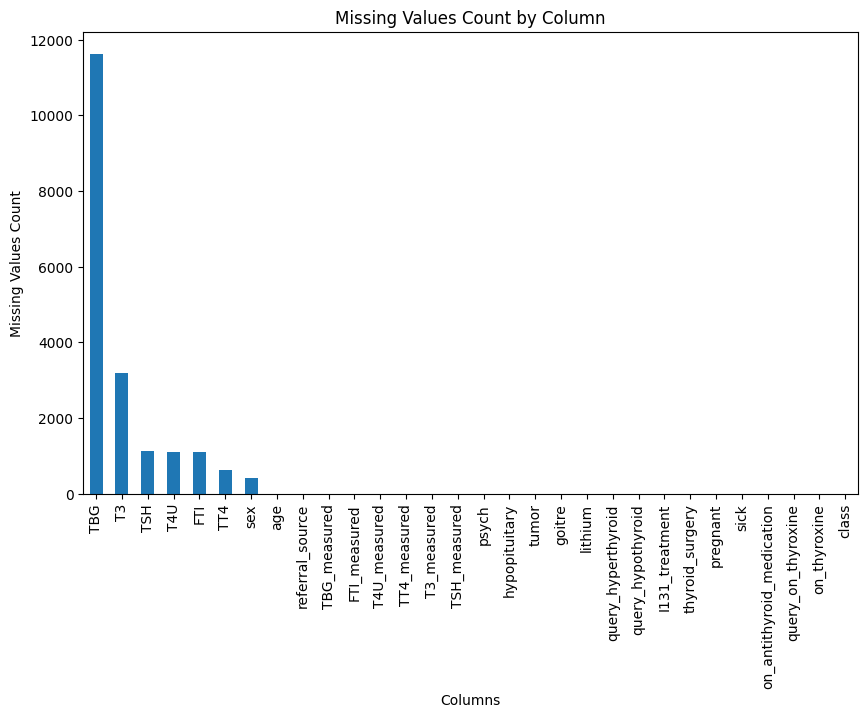

In [13]:
missing_values_count = df.isnull().sum().sort_values(ascending=False)
missing_values_count.plot(kind='bar', figsize=(10, 6))
plt.title('Missing Values Count by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.show()

drop those columns that have more than 50% of missing values as they would otherwise make our model biased even if we try to impute mean or median values.

In [14]:
threshold = 0.5
column_threshold = int(0.5 * len(df))
column_threshold

5986

In [15]:
# Drop columns with more missing values than the threshold
df = df.dropna(axis=1, thresh=column_threshold)

In [16]:
df.shape

(11972, 29)

we now have 29 columns remaining and rest

## Dropping the measured columns
we are dropping the measured columns because we have already obtained the measurements values.
but before dropping the measurements we need to replace the false measurements values with 0 and in case if TRUE value is also missing then we can do mean value replacement.

In [17]:
# check for missing TRUE and FALSE values in TT4 data
tt4_missing_values_true = df.loc[df['TT4_measured'] == 't', 'TT4'].isnull().sum()
tt4_missing_values_false = df.loc[df['TT4_measured'] == 'f', 'TT4'].isnull().sum()


In [18]:
print(tt4_missing_values_true)
print(tt4_missing_values_false)


0
626


we can confirm that for this column no TRUE values are missing, we can replace false values with 0 as this test is not conducted

In [19]:
df.shape

(11972, 29)

In [20]:
# replacing the false values with 0 
df.loc[df['TT4_measured'] == 'f', 'TT4'] = df['TT4'].fillna(0)

In [21]:
tt4_missing_values_false = df.loc[df['TT4_measured'] == 'f', 'TT4'].isnull().sum()
tt4_missing_values_false

0

#### TSH false value replacement

In [22]:
# check for missing TRUE and FALSE values in TT4 data
tsh_missing_values_true = df.loc[df['TSH_measured'] == 't', 'TSH'].isnull().sum()
tsh_missing_values_false = df.loc[df['TSH_measured'] == 'f', 'TSH'].isnull().sum()
print(tsh_missing_values_true)
print(tsh_missing_values_false)

0
1126


In [23]:
df.loc[df['TSH_measured'] == 'f', 'TSH'] = df['TSH'].fillna(0)

#### T3 false value replacement

In [24]:
# check for missing TRUE and FALSE values in TT4 data
t3_missing_values_true = df.loc[df['T3_measured'] == 't', 'T3'].isnull().sum()
t3_missing_values_false = df.loc[df['T3_measured'] == 'f', 'T3'].isnull().sum()
print(t3_missing_values_true)
print(t3_missing_values_false)

0
3189


In [25]:
df.loc[df['T3_measured'] == 'f', 'T3'] = df['T3'].fillna(0)

#### FTI false value replacement

In [26]:
# check for missing TRUE and FALSE values in FTI data
FTI_missing_values_true = df.loc[df['FTI_measured'] == 't', 'FTI'].isnull().sum()
FTI_missing_values_false = df.loc[df['FTI_measured'] == 'f', 'FTI'].isnull().sum()
print(FTI_missing_values_true)
print(FTI_missing_values_false)

0
1097


In [27]:
df.loc[df['FTI_measured'] == 'f', 'FTI'] = df['FTI'].fillna(0)

#### TT4 false values replacement


In [28]:
# check for missing TRUE and FALSE values in T4U data
T4U_missing_values_true = df.loc[df['T4U_measured'] == 't', 'T4U'].isnull().sum()
T4U_missing_values_false = df.loc[df['T4U_measured'] == 'f', 'T4U'].isnull().sum()
print(T4U_missing_values_true)
print(T4U_missing_values_false)

0
1106


In [29]:
df.loc[df['T4U_measured'] == 'f', 'T4U'] = df['T4U'].fillna(0)

now again check for missing values

In [30]:
df.isnull().sum().sort_values(ascending=False)

sex                          417
age                            1
psych                          0
referral_source                0
TBG_measured                   0
FTI                            0
FTI_measured                   0
T4U                            0
T4U_measured                   0
TT4                            0
TT4_measured                   0
T3                             0
T3_measured                    0
TSH                            0
TSH_measured                   0
hypopituitary                  0
tumor                          0
goitre                         0
lithium                        0
query_hyperthyroid             0
query_hypothyroid              0
I131_treatment                 0
thyroid_surgery                0
pregnant                       0
sick                           0
on_antithyroid_medication      0
query_on_thyroxine             0
on_thyroxine                   0
class                          0
dtype: int64

now we have 'SEX' columns with missing values and 'AGE' column have 1 missing value for 'SEX' we can replace missing values with mode and "AGE" with mean.

In [31]:
df1=df

In [32]:
# Handling missing data in 'sex' column
most_frequent_sex = df['sex'].mode()[0]
df.loc[df['sex'].isnull(), 'sex'] = most_frequent_sex



In [33]:
# Handling missing data in 'age' column
median_age = df['age'].median()
print(median_age)
df.loc[df['age'].isnull(), 'age'] = median_age

55.0


In [34]:
df.isnull().sum().sort_values(ascending=False)

age                          0
psych                        0
referral_source              0
TBG_measured                 0
FTI                          0
FTI_measured                 0
T4U                          0
T4U_measured                 0
TT4                          0
TT4_measured                 0
T3                           0
T3_measured                  0
TSH                          0
TSH_measured                 0
hypopituitary                0
sex                          0
tumor                        0
goitre                       0
lithium                      0
query_hyperthyroid           0
query_hypothyroid            0
I131_treatment               0
thyroid_surgery              0
pregnant                     0
sick                         0
on_antithyroid_medication    0
query_on_thyroxine           0
on_thyroxine                 0
class                        0
dtype: int64

We can now observe that the we do not have any missing values, now we can drop the 'measured' columns

In [35]:

drop_cols = ['TBG_measured', 'FTI_measured','TT4_measured', 'T3_measured','TSH_measured','T4U_measured']
df.drop(columns=drop_cols, inplace=True)

C:\Users\aakas\AppData\Local\Temp\ipykernel_2744\1555245797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=drop_cols, inplace=True)


In [36]:
df.shape

(11972, 23)

In [37]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,class
0,41.0,f,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,svhc,negative
1,23.0,f,f,f,f,f,f,f,f,f,...,f,f,f,4.10,2.0,102.0,0.00,0.0,other,negative
2,46.0,m,f,f,f,f,f,f,f,f,...,f,f,f,0.98,0.0,109.0,0.91,120.0,other,negative
3,70.0,f,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175.0,0.00,0.0,other,negative
4,70.0,f,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,svi,negative


In [38]:
df.dtypes

age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
sick                          object
pregnant                      object
thyroid_surgery               object
I131_treatment                object
query_hypothyroid             object
query_hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
referral_source               object
class                         object
dtype: object

In [39]:
# Find categorical columns
categorical_columns = df.select_dtypes(include=['object'])

# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'sex': ['f' 'm']
Unique values in 'on_thyroxine': ['f' 't']
Unique values in 'query_on_thyroxine': ['f' 't']
Unique values in 'on_antithyroid_medication': ['f' 't']
Unique values in 'sick': ['f' 't']
Unique values in 'pregnant': ['f' 't']
Unique values in 'thyroid_surgery': ['f' 't']
Unique values in 'I131_treatment': ['f' 't']
Unique values in 'query_hypothyroid': ['f' 't']
Unique values in 'query_hyperthyroid': ['f' 't']
Unique values in 'lithium': ['f' 't']
Unique values in 'goitre': ['f' 't']
Unique values in 'tumor': ['f' 't']
Unique values in 'hypopituitary': ['f' 't']
Unique values in 'psych': ['f' 't']
Unique values in 'referral_source': ['svhc' 'other' 'svi' 'stmw' 'svhd' 'west']
Unique values in 'class': ['negative' 'increased binding protein' 'decreased binding protein' 's'
 'f' 'ak' 'r' 'i' 'm' 'n' 'g' 'k' 'a' 'kj' 'l' 'mk' 'q' 'j' 'c|i' 'o' 'lj'
 'h|k' 'd' 'gk' 'mi' 'p' 'fk' 'b' 'gi' 'c' 'gkj' 'oi' 'd|r' 'e']


here we do not see any null as unique value so, it means that our missing value is complete

## Outliers detection and removal

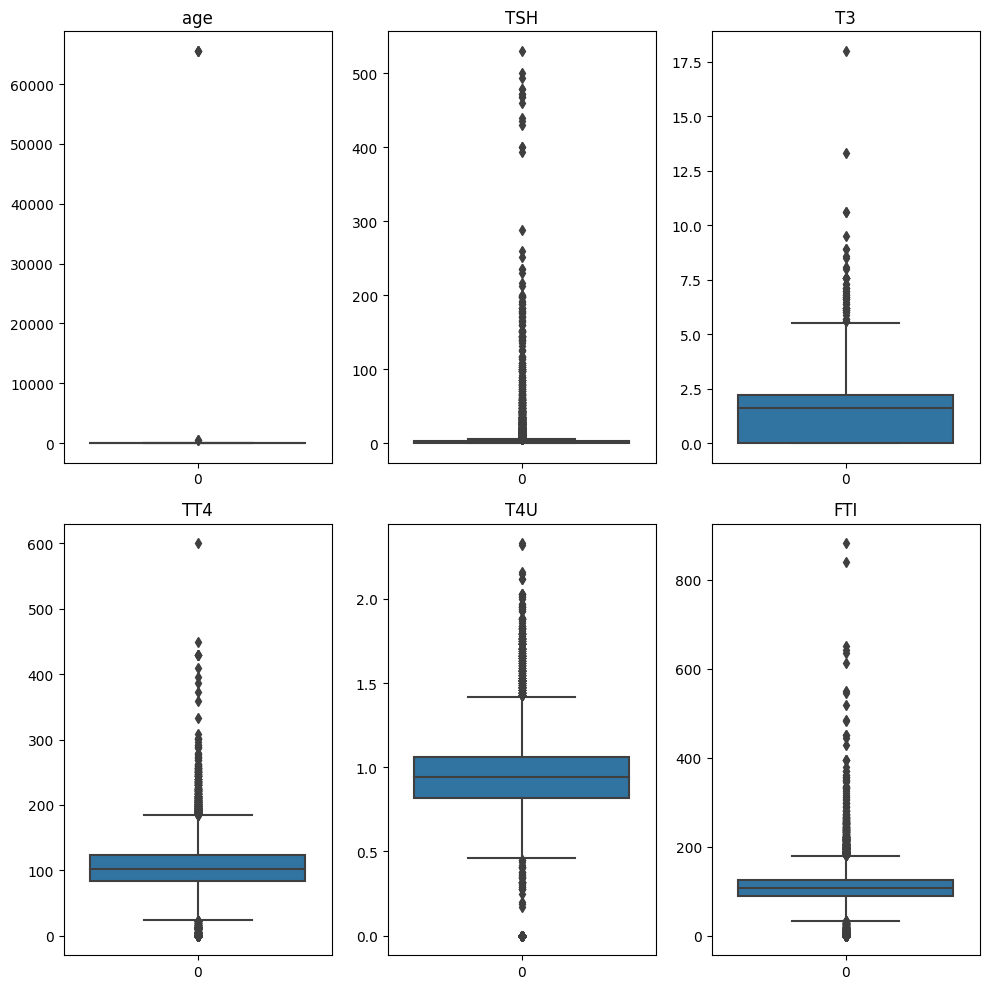

In [40]:
#Boxplot to detect outlier
numerical_col = df.select_dtypes(include=['float64'])

fig,axes=plt.subplots(2,3,figsize=(10,10))

for ax,col in zip(axes.flatten(),numerical_col.columns):
    sns.boxplot(numerical_col[col],ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

we can observe that "AGE" column have a very large outlier value we can replace these values

In [41]:
# Calculate IQR for the 'age' column
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [42]:
# Remove outliers from the 'age' column
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]


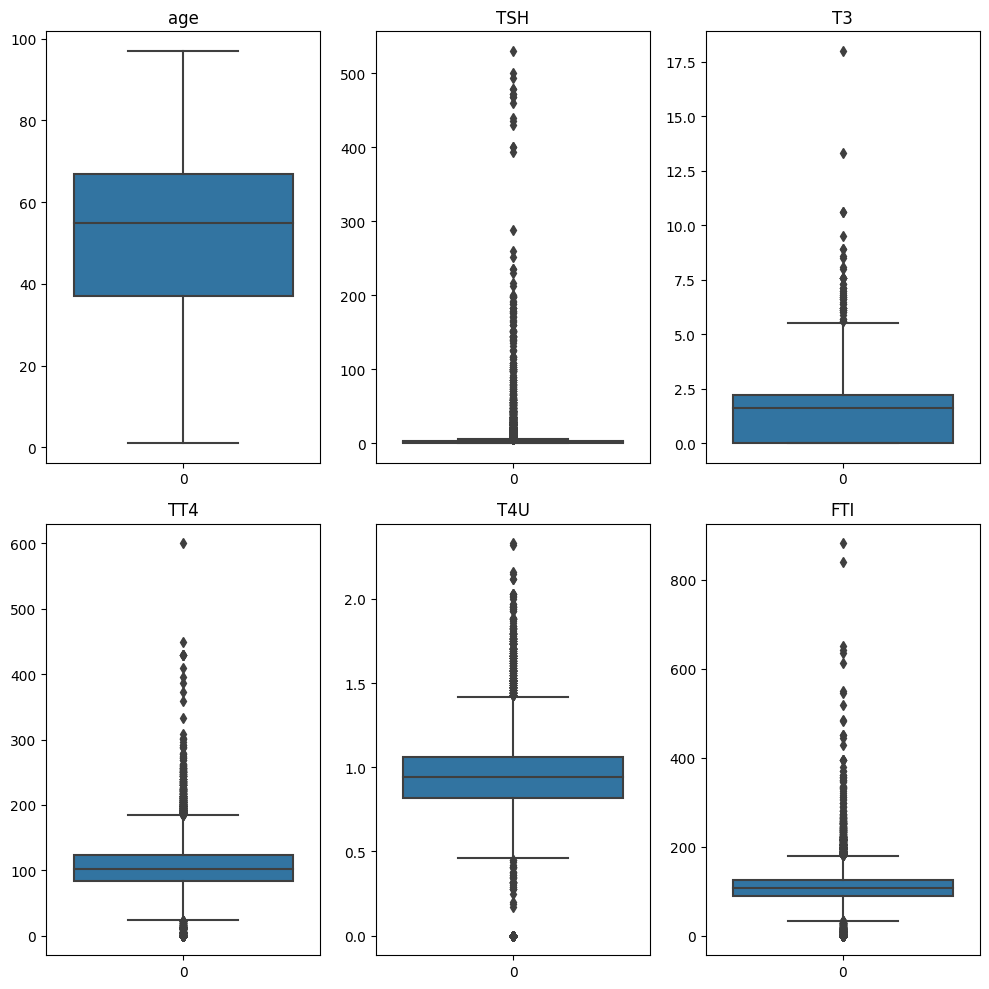

In [43]:
#Boxplot to detect outlier
numerical_col = df.select_dtypes(include=['float64'])

fig,axes=plt.subplots(2,3,figsize=(10,10))

for ax,col in zip(axes.flatten(),numerical_col.columns):
    sns.boxplot(numerical_col[col],ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

ok now we can observe that the age parameter is well distributed and free from outliers, originally we had 11972 now after removing outliers AGE we have 11967 data points, only 5 points removed: not a big loss.


Lets check the distribution as well

In [44]:
numerical_col=df.select_dtypes(exclude=['object'])
numerical_col.shape

(11967, 6)

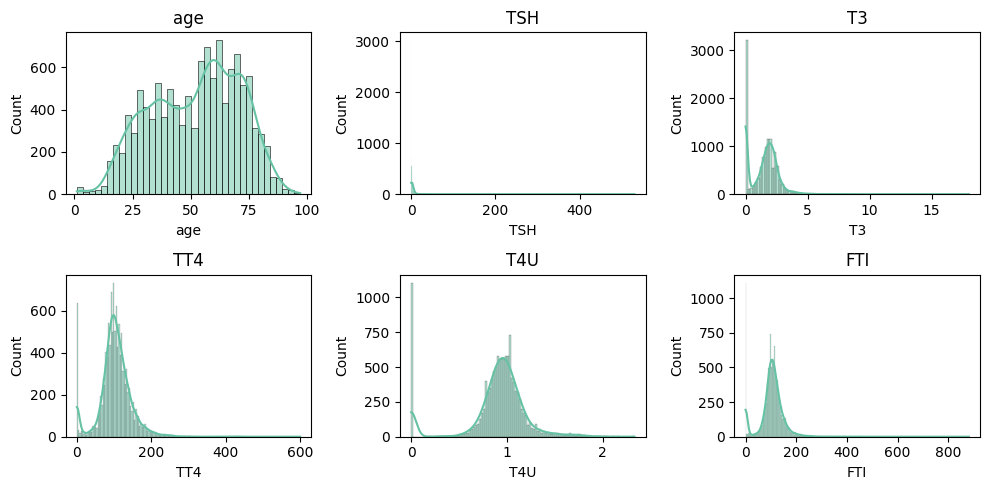

In [46]:
sns.set_palette("Set2")
fig,axes=plt.subplots(2,3,figsize=(10,5))
for ax,column in zip(axes.flatten(),numerical_col.columns):
    sns.histplot(data=df,x=column,ax=ax,kde=True)
    ax.set_title(column, fontsize=12)
plt.tight_layout()


In [46]:
# numerical_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
# # Apply log transformation to the selected columns
# transformed_data = df[numerical_columns].apply(np.log1p)


# # Combine transformed data with the rest of the columns
# data_frame_transformed = pd.concat([df.drop(columns=numerical_columns), transformed_data], axis=1)




In [ ]:
# numerical_col = data_frame_transformed.select_dtypes(include=['float64'])
# sns.set_palette("Set2")
# fig,axes=plt.subplots(2,3,figsize=(10,5))
# for ax,column in zip(axes.flatten(),numerical_col.columns):
#     sns.histplot(data=data_frame_transformed,x=column,ax=ax,kde=True)
#     ax.set_title(column, fontsize=12)
# plt.tight_layout()


In [47]:
df.shape

(11967, 23)

now lets try to work with outliers on TSH columns, find out the %age of TSH points which are greater than 50 with whole datapoint

In [48]:
filtered_data = df[
    (df['TSH'] > 50) 
]

# Create a new DataFrame with only the selected class names
new_data_frame = filtered_data[['class', 'TSH']]

new_data_frame

,class,TSH
88,negative,160.0
116,negative,151.0
224,negative,143.0
259,negative,108.0
282,negative,86.0
...,...,...
11804,f,106.0
11845,g,85.0
11850,f,59.0
11865,f,78.0


if keep ideal threshold like > 50 then we have got 189 rows, now let's try using z-score

In [49]:
(new_data_frame.shape[0]/df.shape[0])*100

1.579343193782903

number of outliers is nearly 1.5 of whole data, but lets do a z-score test and remove all the outliers that are above or below the 3 standard deviations

In [50]:
# Calculate Z-scores for the 'TSH' column
z_scores = np.abs((df['TSH'] - df['TSH'].mean()) / df['TSH'].std())

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Identify outliers
outliers = df[z_scores > threshold]

print("Outliers:")
print(outliers)

Outliers:
        age sex on_thyroxine query_on_thyroxine on_antithyroid_medication  \
88     39.0   f            f                  f                         f   
116    50.0   m            f                  f                         f   
224    79.0   f            f                  f                         f   
259    63.0   m            f                  f                         f   
282    70.0   m            f                  f                         f   
...     ...  ..          ...                ...                       ...   
11580  56.0   m            f                  f                         f   
11666  19.0   f            f                  f                         f   
11804  51.0   f            f                  f                         f   
11845  66.0   f            f                  f                         f   
11865  73.0   f            f                  f                         f   

      sick pregnant thyroid_surgery I131_treatment query_hypothyr

observe that with z-score thresholds greater than 3 we have only 134 obserations removed, which much better than keeping hard thresholds

In [51]:
removal_count = 0
removal_count += outliers.shape[0]
removal_count

134

In [69]:
df1=df
df1.shape

(11967, 23)

In [68]:
df = df1

In [70]:
df.shape

(11967, 23)

In [71]:
# Select the numerical columns from the dataset
numerical_cols = [ 'TT4','TSH', 'T3', 'T4U', 'FTI']

# Define a threshold for identifying outliers (e.g., Z-score > 2)
threshold = 3

# Iterate over the columns and remove outliers
non_outliers_data_frame = df.copy()  # Create a copy to store non-outliers
for column in numerical_cols:
    z_scores = np.abs((non_outliers_data_frame[column] - non_outliers_data_frame[column].mean()) / non_outliers_data_frame[column].std())
    non_outliers_data_frame = non_outliers_data_frame[(z_scores <= threshold)]
    #removal_count += non_outliers_data_frame.shape[0]

print("DataFrame without outliers:")
#print(non_outliers_data_frame)


DataFrame without outliers:


In [72]:
non_outliers_data_frame.shape

(11606, 23)

In [73]:
data = non_outliers_data_frame

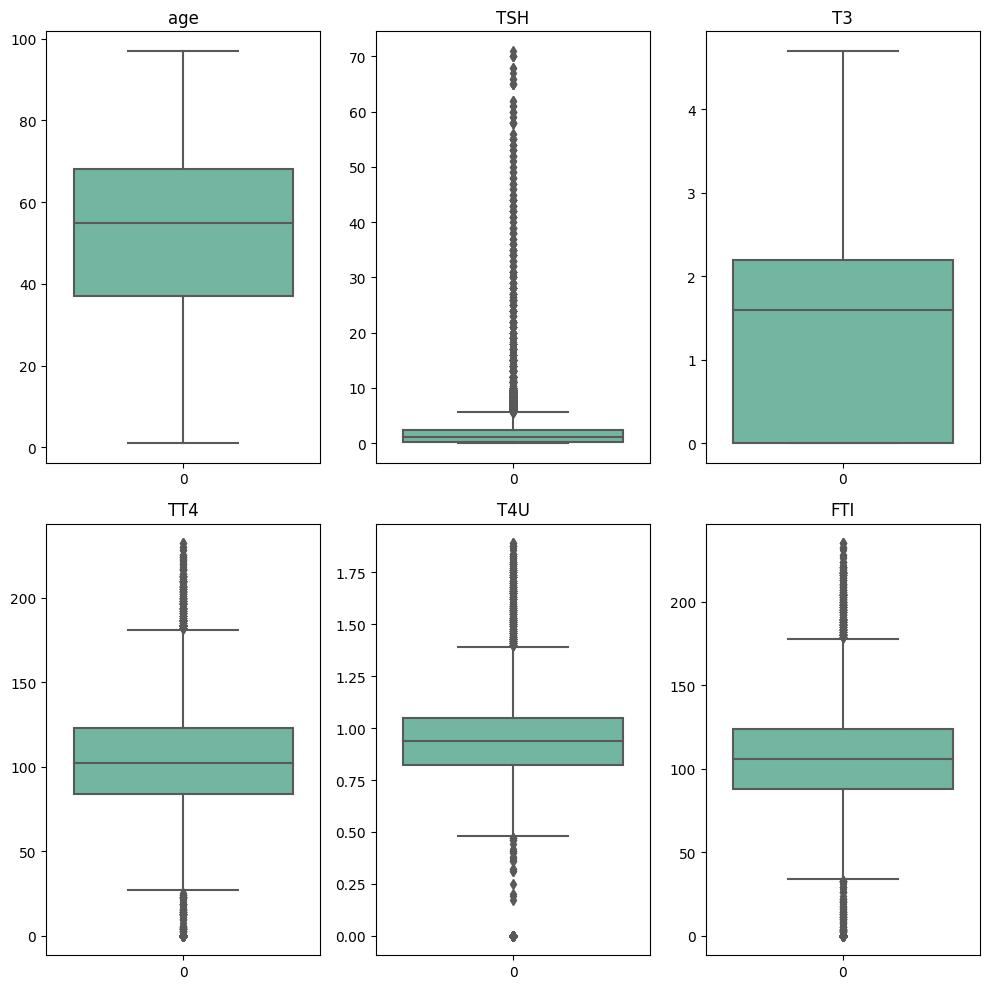

In [74]:
#Boxplot to detect outlier
numerical_col = non_outliers_data_frame.select_dtypes(include=['float64'])

fig,axes=plt.subplots(2,3,figsize=(10,10))

for ax,col in zip(axes.flatten(),numerical_col.columns):
    sns.boxplot(numerical_col[col],ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

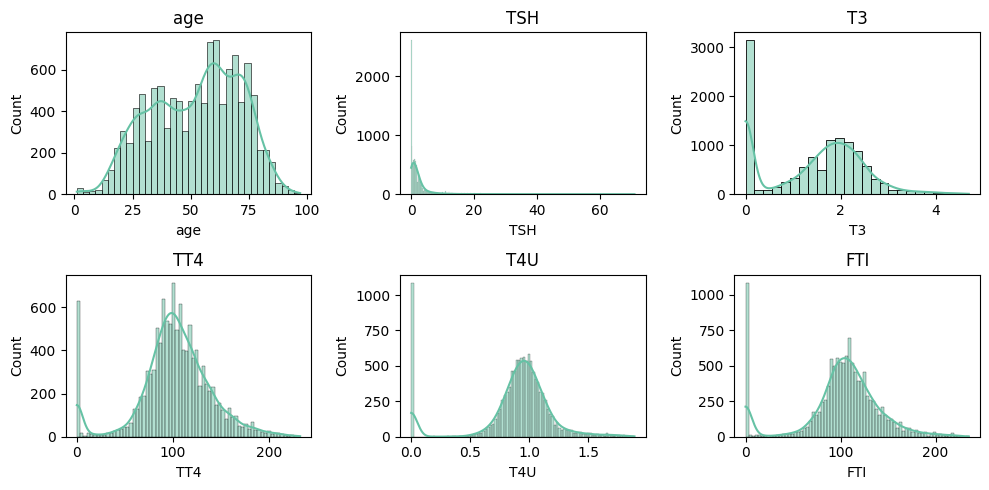

In [75]:
numerical_col = non_outliers_data_frame.select_dtypes(include=['float64'])
sns.set_palette("Set2")
fig,axes=plt.subplots(2,3,figsize=(10,5))
for ax,column in zip(axes.flatten(),numerical_col.columns):
    sns.histplot(data=non_outliers_data_frame,x=column,ax=ax,kde=True)
    ax.set_title(column, fontsize=12)
plt.tight_layout()


so we can observe that we have removed outliers and our distribution is looking much more gaussian, except that 0 which we have added erly on to replace NaNs

In [76]:
non_outliers_data_frame.shape

(11606, 23)

In [77]:
# data loss

df.shape

(11967, 23)

#### List the categorical and numerical columns

In [61]:
data = non_outliers_data_frame


In [78]:


# List of numerical columns
numerical_columns = data.select_dtypes(include=['float64']).columns.tolist()

# List of categorical columns
categorical_columns = data.select_dtypes(exclude=['float64']).columns.tolist()
print(numerical_columns)

# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
Unique values in 'sex': ['f' 'm']
Unique values in 'on_thyroxine': ['f' 't']
Unique values in 'query_on_thyroxine': ['f' 't']
Unique values in 'on_antithyroid_medication': ['f' 't']
Unique values in 'sick': ['f' 't']
Unique values in 'pregnant': ['f' 't']
Unique values in 'thyroid_surgery': ['f' 't']
Unique values in 'I131_treatment': ['f' 't']
Unique values in 'query_hypothyroid': ['f' 't']
Unique values in 'query_hyperthyroid': ['f' 't']
Unique values in 'lithium': ['f' 't']
Unique values in 'goitre': ['f' 't']
Unique values in 'tumor': ['f' 't']
Unique values in 'hypopituitary': ['f' 't']
Unique values in 'psych': ['f' 't']
Unique values in 'referral_source': ['svhc' 'other' 'svi' 'stmw' 'svhd' 'west']
Unique values in 'class': ['negative' 'increased binding protein' 'decreased binding protein' 's'
 'f' 'ak' 'r' 'i' 'm' 'n' 'g' 'k' 'l' 'q' 'j' 'c|i' 'o' 'lj' 'h|k' 'gk'
 'mi' 'a' 'kj' 'p' 'fk' 'b' 'mk' 'gi' 'c' 'gkj' 'oi' 'd|r' 'e']


#### Replace categoric values with numeric values

In [79]:
# map sex column values to 0 and 1
data['sex'] = data['sex'].map({'f': 0, 'm': 1})

In [80]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,class
0,41.0,0,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,svhc,negative
1,23.0,0,f,f,f,f,f,f,f,f,...,f,f,f,4.10,2.0,102.0,0.00,0.0,other,negative
2,46.0,1,f,f,f,f,f,f,f,f,...,f,f,f,0.98,0.0,109.0,0.91,120.0,other,negative
3,70.0,0,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175.0,0.00,0.0,other,negative
4,70.0,0,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,svi,negative


In [82]:
categorical_columns_to_convert = [
    'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
    'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment',
    'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre',
    'tumor', 'hypopituitary', 'psych'
]

In [83]:
# map all othere categorical function to 0 and 1
for column in categorical_columns_to_convert:
    if len(data[column].unique()) == 2:
       data[column] = data[column].map({'f': 0, 't': 1})

In [84]:
data = pd.get_dummies(data, columns=['referral_source'], drop_first = True)

In [85]:
data.head(100)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,class,referral_source_stmw,referral_source_svhc,referral_source_svhd,referral_source_svi,referral_source_west
0,41.0,0,0,0,0,0,0,0,0,0,...,2.5,125.0,1.14,109.0,negative,False,True,False,False,False
1,23.0,0,0,0,0,0,0,0,0,0,...,2.0,102.0,0.00,0.0,negative,False,False,False,False,False
2,46.0,1,0,0,0,0,0,0,0,0,...,0.0,109.0,0.91,120.0,negative,False,False,False,False,False
3,70.0,0,1,0,0,0,0,0,0,0,...,1.9,175.0,0.00,0.0,negative,False,False,False,False,False
4,70.0,0,0,0,0,0,0,0,0,0,...,1.2,61.0,0.87,70.0,negative,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,69.0,0,0,0,0,0,0,0,0,0,...,0.0,123.0,0.91,136.0,negative,False,False,False,True,False
99,48.0,0,0,0,0,0,0,0,0,0,...,1.6,86.0,0.93,92.0,negative,False,False,False,True,False
100,28.0,0,0,0,0,0,0,0,0,0,...,1.4,120.0,0.82,146.0,negative,False,False,False,True,False
101,62.0,1,0,0,0,1,0,0,0,0,...,1.5,105.0,0.86,122.0,negative,False,False,False,False,False


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11606 entries, 0 to 11971
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        11606 non-null  float64
 1   sex                        0 non-null      float64
 2   on_thyroxine               11606 non-null  int64  
 3   query_on_thyroxine         11606 non-null  int64  
 4   on_antithyroid_medication  11606 non-null  int64  
 5   sick                       11606 non-null  int64  
 6   pregnant                   11606 non-null  int64  
 7   thyroid_surgery            11606 non-null  int64  
 8   I131_treatment             11606 non-null  int64  
 9   query_hypothyroid          11606 non-null  int64  
 10  query_hyperthyroid         11606 non-null  int64  
 11  lithium                    11606 non-null  int64  
 12  goitre                     11606 non-null  int64  
 13  tumor                      11606 non-null  int64  


In [ ]:
# for referral_source convert the data into one hot encoding format
data =  pd.get_dummies()

In [6]:
df.duplicated().sum()
#There are 10 duplicated value

10

In [8]:
#column name
df.columns.unique()

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'class'],
      dtype='object')

In [7]:
#convert datatype.
df[['TSH','T3','TT4','T4U','FTI','TBG']]=df[['TSH','T3','TT4','T4U','FTI','TBG']].astype(float)

In [8]:
df_categorical=df.select_dtypes(include=['object'])
for i in df_categorical.columns:
    print(f'{i}: {df_categorical[i].unique()}')

sex: ['F' 'M' nan]
on_thyroxine: ['f' 't' nan]
query_on_thyroxine: ['f' 't' nan]
on_antithyroid_medication: ['f' 't' nan]
sick: ['f' 't' nan]
pregnant: ['f' 't' nan]
thyroid_surgery: ['f' 't' nan]
I131_treatment: ['f' 't' nan]
query_hypothyroid: ['t' 'f' nan]
query_hyperthyroid: ['f' 't' nan]
lithium: ['f' 't' nan]
goitre: ['f' 't' nan]
tumor: ['f' 't' nan]
hypopituitary: ['f' 't' nan]
psych: ['f' 't' nan]
TSH_measured: ['t' 'f' nan]
T3_measured: ['f' 't' nan]
TT4_measured: ['f' 't' nan]
T4U_measured: ['f' 't' nan]
FTI_measured: ['f' 't' nan]
TBG_measured: ['f' 't' nan]
referral_source: ['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST' nan]
class: ['negative' 'S' 'F' 'AK' 'R' 'I' 'M' 'N' 'G' 'K' 'A' 'KJ' 'L' 'MK' 'Q' 'J'
 'C|I' 'O' 'LJ' 'H|K' 'D' 'GK' 'MI' 'P' 'FK' 'B' 'GI' 'C' 'GKJ' 'OI' 'D|R'
 'E' nan]


In [9]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [10]:

value_count=df['class'].value_counts()
#now we will remove those classes which have value counts less than 50, 
filter_class=value_count[value_count<50]
filtered_df = df[df['class'].apply(lambda x: x not in filter_class)]
filtered_df.head()
print(filtered_df.shape)
#Now we are left with 8910 rows.


(8910, 30)


In [11]:
#class features replaced with their group
mapping={'A':'Hyperthyroidism','F':'Hypothyroidism','G':'Hypothyroidism','I':'increased binding protein','K':'concurrent non-thyroidal illness',
         'L':'replacement therapy','M':'replacement therapy','N':'replacement therapy','R':'miscellaneous','S':'miscellaneous','negative':'normal'}
		
         
filtered_df['class']=filtered_df['class'].map(mapping)
filtered_df['class'].value_counts()


C:\Users\hp\AppData\Local\Temp\ipykernel_12328\484152751.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['class']=filtered_df['class'].map(mapping)


class
normal                              6771
Hypothyroidism                       592
concurrent non-thyroidal illness     436
increased binding protein            346
replacement therapy                  336
miscellaneous                        281
Hyperthyroidism                      147
Name: count, dtype: int64

TBG                          8563
T3                           2593
TSH                           835
T4U                           804
FTI                           797
TT4                           443
sex                           291
age                             1
referral_source                 1
TBG_measured                    1
FTI_measured                    1
T4U_measured                    1
TT4_measured                    1
T3_measured                     1
TSH_measured                    1
psych                           1
hypopituitary                   1
tumor                           1
goitre                          1
lithium                         1
query_hyperthyroid              1
query_hypothyroid               1
I131_treatment                  1
thyroid_surgery                 1
pregnant                        1
sick                            1
on_antithyroid_medication       1
query_on_thyroxine              1
on_thyroxine                    1
class         

In [13]:
#columns having single missing value will be removed and remaining value will be replaced with their mean or mode
filtered_df=filtered_df.dropna(subset=['class'])#remove row have missing value
#let's do mean imputation of remaining missing values
filtered_df[['FTI','TSH','T3','TT4','T4U']]=filtered_df[['FTI','TSH','T3','TT4','T4U']].fillna(filtered_df[['FTI','TSH','T3','TT4','T4U']].mean())
filtered_df['sex']=filtered_df['sex'].fillna(filtered_df['sex'].mode)
filtered_df.drop('TBG',axis=1,inplace=True)
filtered_df.shape


(8909, 29)

In [14]:
#Handle duplicated values
filtered_df.duplicated().sum()
filtered_df.drop_duplicates(inplace=True)

In [15]:
#remove unnecessary columns
#we can remove referral source, TBG_measured,T3_measured,FTI_measured,T4U_measured,TT4_measured and TSH_measured
filtered_df=filtered_df.drop(['TBG_measured','TT4_measured','T3_measured','TSH_measured','FTI_measured','referral_source'
                              ,'T4U_measured'],axis=1)

In [16]:
filtered_df=filtered_df[filtered_df['age']<200]

## EDA

In [17]:
numerical_col=filtered_df.select_dtypes(exclude=['object'])
numerical_col.shape

(8808, 6)

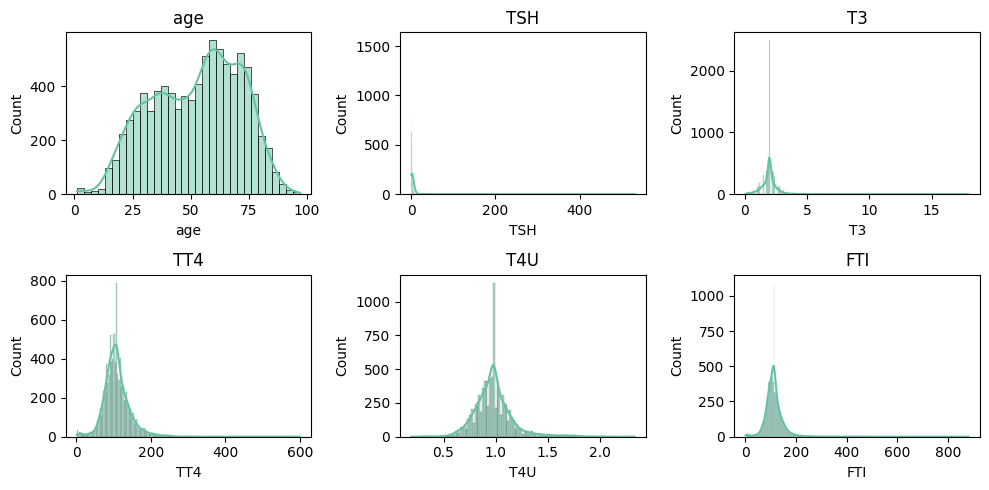

In [18]:
sns.set_palette("Set2")
fig,axes=plt.subplots(2,3,figsize=(10,5))
for ax,column in zip(axes.flatten(),numerical_col.columns):
    sns.histplot(data=filtered_df,x=column,ax=ax,kde=True)
    ax.set_title(column, fontsize=12)
plt.tight_layout()


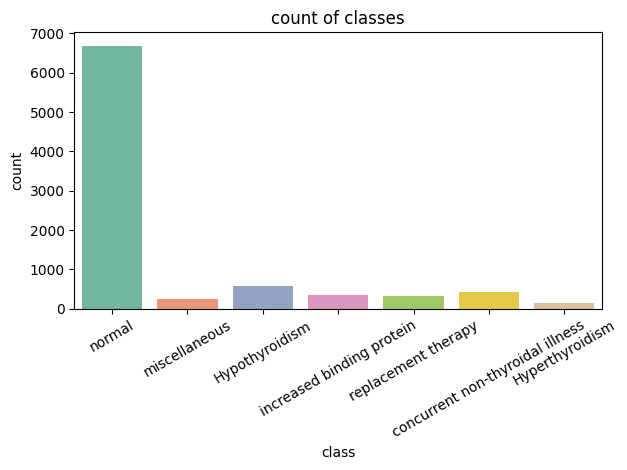

In [20]:
sns.set_palette("Set2")
sns.countplot(data=filtered_df,x=filtered_df['class'])
plt.xlabel('class')
plt.ylabel('count')
plt.title('count of classes')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



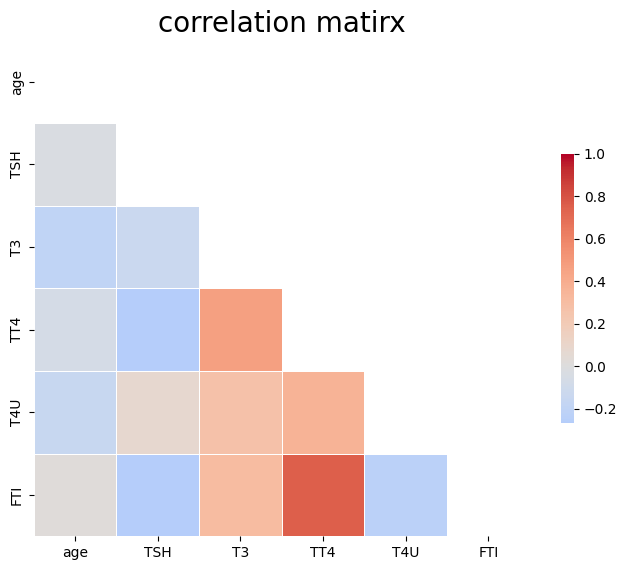

In [21]:
#correlation matrix

corr = numerical_col.corr()
#Generate the mask for upper trainagle
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax=plt.subplots(figsize=(8,7))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap='coolwarm',vmax=1,center=0,square=True,linewidths=0.5,cbar_kws={'shrink':0.5})
plt.title('correlation matirx',fontsize=20)
plt.show()

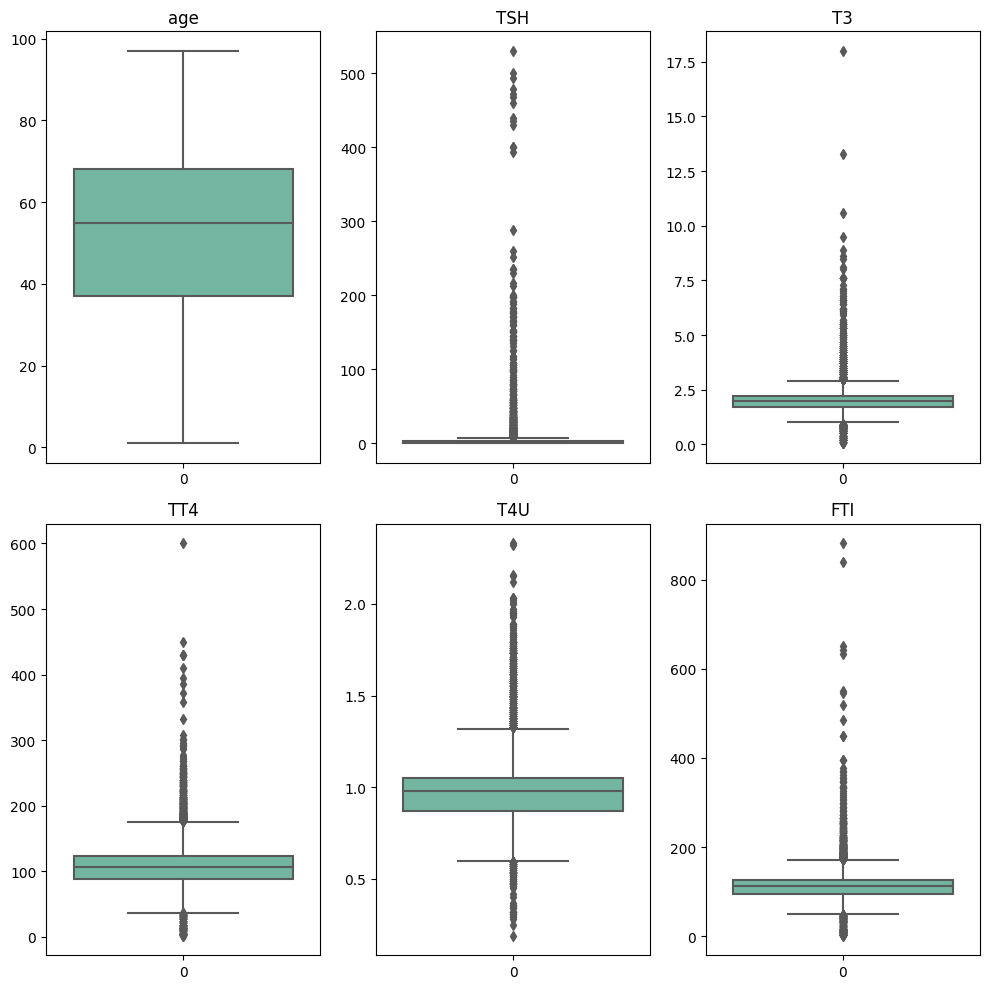

In [22]:
#Boxplot to detect outlier
fig,axes=plt.subplots(2,3,figsize=(10,10))

for ax,col in zip(axes.flatten(),numerical_col.columns):
    sns.boxplot(numerical_col[col],ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()
   

In [53]:
def categorize_tsh_val(tsh_value):
    TSH=''
    if tsh_value == 0:
        TSH = "not_ready"
    elif 0 < tsh_value < 0.2:
        TSH = "low"
    elif 0.2 <= tsh_value <= 6:
        TSH = "normal"
    elif tsh_value>10:
        TSH = "high"
    return TSH

filtered_df['TSH_Cat'] = filtered_df['TSH'].apply(categorize_tsh_val)

def categorize_t3_value(t3_value):
    T3=''
    if t3_value == 0:
        T3 = "not_ready"
    if 0.0 < t3_value < 1.4:
        T3 = "low"
    elif 1.2 <= t3_value <= 2.8:
        T3 = "normal"
    elif t3_value>3.2:
        T3 = "high"
    return T3

filtered_df['T3_Cat'] = filtered_df['T3'].apply(categorize_t3_value)

def categorize_tt4_value(tt4_value):
    TT4=''
    if tt4_value == 0:
        TT4 = "not_ready"
    elif tt4_value>0 and tt4_value<60:
        TT4 = "low"
    elif 60 <= tt4_value <= 150:
        TT4='Normal'
    elif tt4_value>150:
            TT4 = "high"
    return TT4
filtered_df['TT4_Cat'] = filtered_df['TT4'].apply(categorize_tt4_value)

def categorize_t4u_value(t4u_value):
    T4U=''
    if t4u_value == 0:
        T4U = "not_ready"
    elif  0< t4u_value < 0.6:
        T4U='low'
    elif 0.6 <= t4u_value <= 1.25:
        T4U = "normal"
    elif t4u_value > 1.25:
        T4U = "high"
    return T4U
filtered_df['T4U_Cat'] = filtered_df['T4U'].apply(categorize_t4u_value)

def categorize_fti_value(fti_value):
    FTI=''
    if fti_value == 0:
        FTI = "not_ready"
    elif 0 < fti_value < 65:
        FTI = "low"
    elif 65 <= fti_value <= 155:
        FTI = "normal"
    elif fti_value > 155:
        FTI = "high"
    return FTI
filtered_df['FTI_Cat'] = filtered_df['FTI'].apply(categorize_fti_value)
   

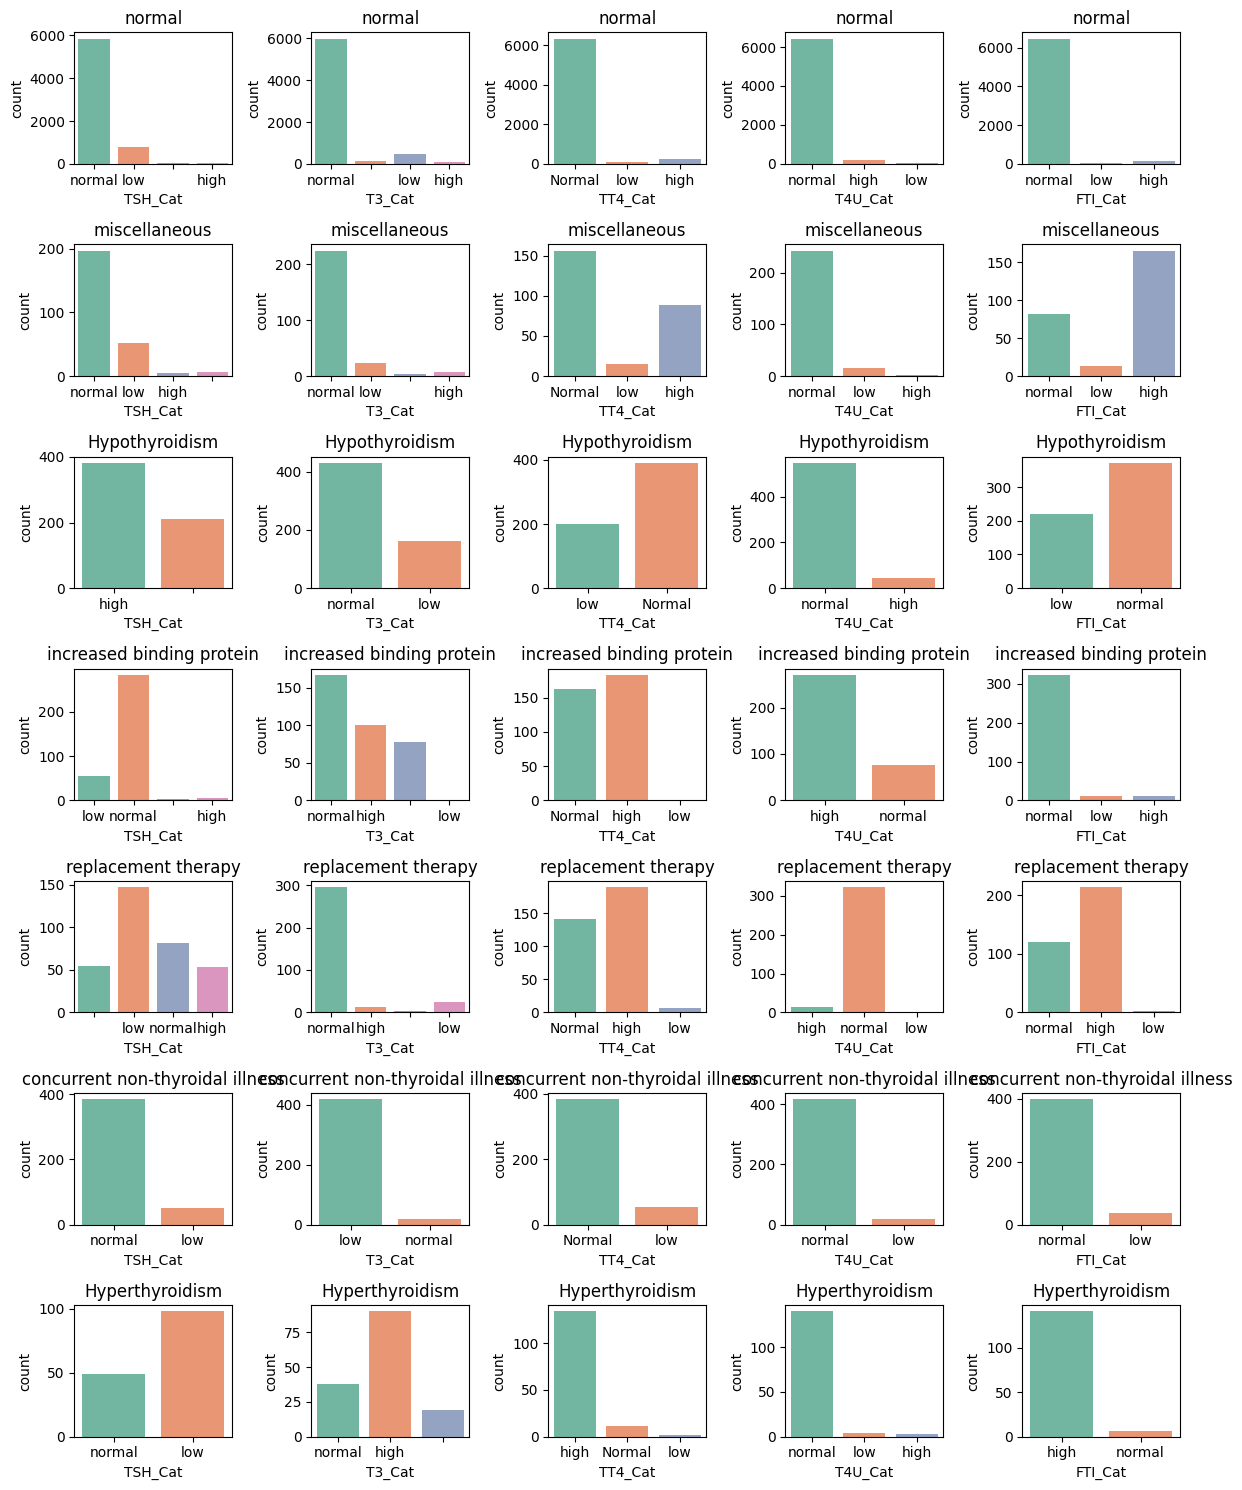

In [71]:
fig, axes = plt.subplots(7, 5, figsize=(12, 15))
inst = ['TSH_Cat', 'T3_Cat', 'TT4_Cat', 'T4U_Cat', 'FTI_Cat']

for i, cls in enumerate(filtered_df['class'].unique()):
    data = filtered_df[filtered_df['class'] == cls]
    for j,cat in enumerate(inst):

        row_idx=i
        col_idx=j
        ax=axes[row_idx,col_idx]
        sns.countplot(data=data, x=cat, ax=ax)
        ax.set_title(cls)  # Set the title to the class name

# Adjust layout
plt.tight_layout()
plt.show()

Insights


In [73]:

quantiles = np.quantile(filtered_df['T3'], [0.0, 0.25, 0.5, 0.75, 1.0])
min_val, q1, q2, q3, max_val = quantiles

print("Minimum:", min_val)
print("Q1:", q1)
print("Q2:", q2)
print("Q3:", q3)
print("Maximum:", max_val)

Minimum: 0.05
Q1: 1.7
Q2: 1.9770286522083265
Q3: 2.2
Maximum: 18.0


In [75]:
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print(lower_bound)
print(upper_bound)


0.9499999999999996
2.9500000000000006
